In [46]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, arctan2, exp, e
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.io import wavfile, loadmat               
from IPython.display import Video, Audio



%matplotlib inline

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Sampling and Quantization

* **Course AIS2201 - Signal Processing**
* **Uke 35, 2024**
* **Lecturer: Kai Erik Hoff**



## Topics

* Intro/sampling recap
* Sampling and normalized frequencies
* Intro to Aliasing
* Nyquist Sampling Theorem
* Sampling and the signal spectrum


# Uniform Sampling

* Sampling a signal at regular intervals $T_s$.
    * Crucial for both frequency analysis and filtering

<img src="figures/Fig9_Ts.png" style="width: 80%; margin-left: 100px" />


# Sampling frequency and sampling period

* **Sampling frequency:**
    - Number of samples taken per second ($f_s$)
* **Samplingsperiode:**
    - Time interval between samples ($T_s$)
    $$T_s = \frac{1}{f_s}$$
* Relation between time of conversion $t_n$ and sample number $n$:
$$\begin{align}t_n &= n\cdot T_s = \frac{n}{f_s} \\
n &= \frac{t_n}{T_s} = t_n\cdot f_s\end{align}$$
* Ideal sampling expressed mathematically:
$$x[n] = x(t)|_{t = n\cdot T_s}$$

# Ideal sampling

* Samples of the analog signal $x(t)$ are taken without error at the precise moment $t=n\cdot T_s$.

<img src="figures/ideal_sampling.svg" style="width: 60%; margin-left: 100px">
     
* _More on non-ideal sampling later._

# Sampling sinusoids

* We can find an expression for the discrete sinusoid.

\begin{align}
x(t) &= \cos(2\pi f \cdot t + \phi) \\
x[n] &= x(t)|_{t=n\cdot T_s} \\
&= \cos(2\pi f\cdot nT_s +\phi)\\
&= \cos\left(2\pi \frac{f}{f_s}\cdot n + \phi\right)
\end{align}



* ***Normalized Frequency***
    - alternatively *Digital Frequency*
$$\begin{align}
\hat{f} &= \frac{f}{f_s}\\
\hat{\omega} &= 2\pi \frac{f}{f_s}
\end{align}$$

* Number of cycles per second "no longer relevant".
* For digital signals the we often measure frequency in *cycles per sample*

* PS. The book does not have a separate notation for normalized frequency, using omega ($\omega$) for "radians per second" **and** "radians per sample". Using the $\hat{\ \ }$ notation is a personal preference from the lecturer to improve clarity.

# Sampling a sine wave

* Frequency spectrum for the signal $x(t) = \cos(100\pi \cdot t)$ sampled with two separate sampling frequencies.

<img src="figures/Fig5_SampledSinusoids.png" style="width: 60%; margin-left: 100px">


## Example 1:

* A sinusoidal signal $x(t)$ with frequency $f=144\text{Hz}$, amplitude $A = 4\text{V}$ and phase $\phi = \frac{\pi}{3} \text{rad}$ is sampled using an A/D converter with sampling frequency $f_s = 800\text{Hz}$.
    - Find an expression $x[n]$ for the sampled sinusoid
    - What is the normalized angular frequency $\hat{\omega}$?
<!--* Et sinusformet signal $x(t)$ med frekvens $f=144\text{Hz}$, amplitude $A = 4\text{V}$ og fase $\theta = \frac{\pi}{3}$ samples av en A/D omformer med samplingsfrekvens $f_s = 800\text{Hz}$. 
    - Hva blir funksjonsuttrykket for det samplede signalet $x[n]$?
    - Hva er den normaliserte vinkelfrekvensen $\hat{\omega}$?-->

# Quantization
<img src="figures/Fig3_Quantization.png" style="width: 60%; margin-left: 100px" />

# Quantization step

* An A/D converter may only sample with finite precision
    * Limited number of discrete voltage levels available to measure
* The distance between each discrete voltage level is the *quantization step size* $q$:
$$\large q = \frac{v_{\text{max}} - v_{\text{min}}}{2^b}$$
where $b$ is the *bit-depth* of the A/D Converter

<img src="figures/quantization_staircase.png" style="width: 50%; margin-left: 100px">


## Example:
- An Arduino has a built-in ADC with $10$ bit resolution
- The ADC operates in the voltage range $v \in [0\text{V}, 5\text{V})$ 
- What is the quantization step size $q$?

- Smallest observable change in voltage:
$$ q = \frac{5V}{2^{10}} = \frac{5V}{1024} \approx 4.89mV$$

# Quantization Error

* Rounding to the closest available quantization step implies an upper bound for quantization error:
$$\large \max\left(e_q(t_n)\right) = \frac{q}{2}$$

* The sampling operation can be modeled as an ideal A/D converter followed by a noise source


<img src="figures/quantization_model.svg" style="width: 50%; margin-left: 100px" />

# Noise




* ***All*** signals will contain a degree of noise in addition to the desired signal
$$\text{measured signal} = \text{desired signal} + \text{noise}$$

* Signal noise sources are modeled as a [stochastic process](https://en.wikipedia.org/wiki/Stochastic_process)


* White noise occurs often in signal processing
    * Each sample of a noise source $x_n[n]$ is **completely random**
    * Noise properties described by a **probability density function**

## Gaussian white noise:
$$\Large x_n[n] \sim \mathcal{N}(\mu=0, \sigma^2=P_q)$$

<img src="figures/Standard_deviation_diagram_micro.svg" style="width: 40%; margin-left: 100px" />

## Uniform white noise:
$$\Large x_n[n] \sim \mathcal{U}(a, b)$$
<img src="figures/Uniform_Distribution_PDF_SVG.svg" style="width: 40%; margin-left: 100px" />

# Noise in the Frequency Domain

* While the value of a white noise source $x_n[n]$ is completely random for any given sample number $n$, the spectral content can still be estimated.

* "White" noise has a flat frequency spectrum *on average*, hence the name.

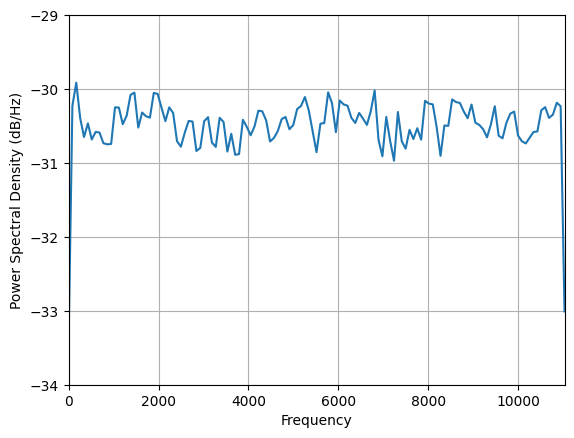

In [68]:
P_e = 10 # Noise Power. Assume unit is Watts...

fs = 22_050

noise = np.random.randn(100000)*np.sqrt(P_e)


plt.psd(noise, Fs=22050);
plt.xlim([0, fs/2]);
plt.show()

Audio(noise, rate=fs)

#### Notes

If we integrate the entire power spectrum curve above, the result will be exactly $10$, or the total signal power $P_e$ used when generating the noise.

# Spectral analysis of noisy signals





* ***All*** signals will contain a degree of noise in addition to the desired signal
$$\text{measured signal} = \text{desired signal} + \text{noise}$$

* White noise is commonly encountered.
    * The amplitude value of the noise at any given time $t$ is *completely* random.

* Noise properties are less challenging to identify in the frequency domain

# Signal-to-noise ratio

* A measure (in $\text{dB}$) of total signal power relative to noise power.
$$SNR = 10 \cdot \log\left(\frac{P_{\text{signal}}}{P_{\text{noise}}}\right)$$
    * Indicates "quality" of a signal. 

* Assuming white noise, signal quality (SNR) may be measured using spectral analysis.
    * How much does the signal's spectral content protrude above the "noise floor"?

# Spectral content of white noise




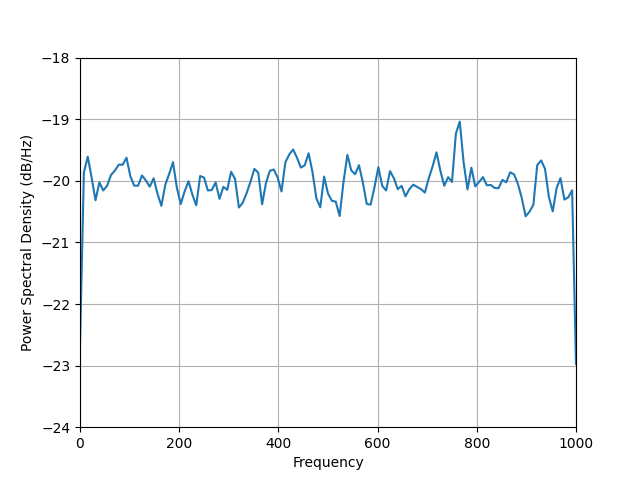

In [16]:
P_q = 10 # Noise Power. Assume unit is Watts...

noise = np.random.randn(100000)*np.sqrt(P_q)

plt.close(2); plt.figure(2)
plt.psd(noise, Fs=2000);
plt.xlim([0, 1000]);

# Time-domain view of a noisy signal


Text(0.5, 0, 'time $t$')

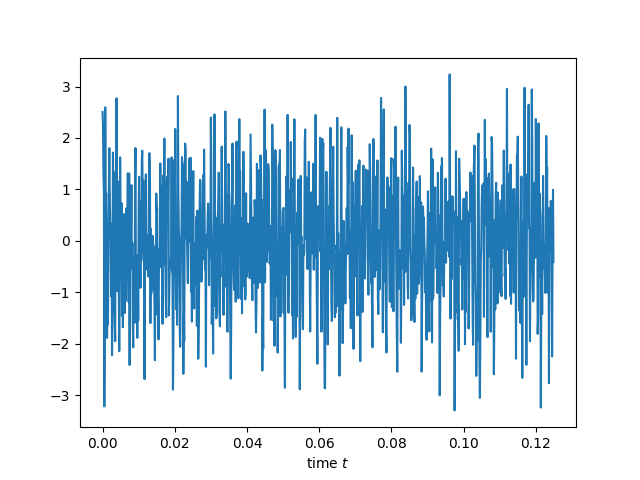

In [22]:
noise = np.random.randn(1000)
t = np.linspace(0, 1/8, 1000, endpoint=False)
signal = cos(2*pi*1000*t)

plt.close(3); plt.figure(3)
plt.plot(t, noise+signal);
plt.xlabel("time $t$")

* Close to impossible to make out the signal

# Spectral content of a noisy signal


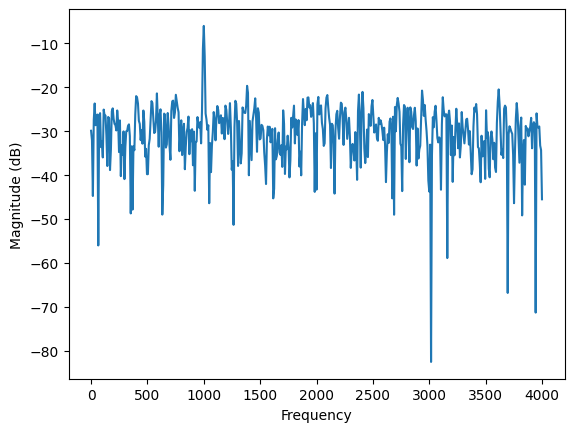

In [59]:
noise = np.random.randn(1000)
t = np.linspace(0, 1/8, 1000, endpoint=False)
signal = cos(2*pi*1000*t)

plt.close(4); plt.figure(4)
plt.magnitude_spectrum(noise+signal,scale="dB",Fs=8000);
plt.show()

* Spectral analysis of real-world signals will typically reveal a "noise-floor" resulting from white background noise.
    * The weaker the background noise, the lower this noise floor will be.
* Picking out the signal from background noise is much easier, as it in the example is raised from the "noise floor" by approx $20 \text{ dB}$.

## Estimating SNR using spectral analysis
<img src="figures/sig_noise.png" style="width: 60%; margin-left: 100px" />

# Quantization Noise

* Quantization error is modeled as uniformly distributed noise

$$e_q[n] \sim \mathcal{U}\left( -\frac{q}{2}, \frac{q}{2} \right)$$

* Quantization error has noise power determined by $q$:
$$ P_q = \frac{q^2}{12}$$

### Code demo

In [60]:
from ipywidgets import interact, IntSlider

V_p = 20

# Hypothetical signal
def x(t): 
    B1 = V_p #Hz
    t_0 = (t[-1]-t[0])/9*4
    s = (t[-1]-t[0])*B1*np.sinc(B1*(t-t_0))*(0.5-0.5*np.cos(2*np.pi*np.arange(len(t))/len(t)))*np.cos(2*pi*100*t)
    return s

def quantize(e: list[float], q: float):
    return np.round(e/q)*q

@interact(bits = IntSlider(min=1, max=12, step=1, value=8))
def quantized_spectrum(bits):

    q = 2*V_p/(2**bits)
    fs = 500
    T = 1
    t_k = np.linspace(0, T, fs*T)
    sigma_q = q**2/12
    
    e_k = quantize(x(t_k), q=q)
    
    plt.magnitude_spectrum(e_k, Fs=fs, scale="dB");
    plt.title("$\\text{SNR} = %.2f \\text{dB}$"%(10*np.log10(V_p/sigma_q)))
    plt.ylim([-100, 1])
    plt.show()

interactive(children=(IntSlider(value=8, description='bits', max=12, min=1), Output()), _dom_classes=('widget-…

# Summary